In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.regularizers import l2  # Import L2 regularization
import pandas as pd
# Load the dataset
Data = pd.read_csv('DualBypass.csv')

In [2]:
Data.head()

,BPR1,BPR2,PR_HPC,PR_IPC,PR_LPC,TIT,TSCOR,TSF,TSFC,TSNoxR,SFC
0,0.2059,0.2059,5.891,4.540,4.202,2021,0.03402,118.5,99.97,0.1805,0.1200
1,0.2058,0.2058,5.890,4.539,4.201,2021,0.03397,118.9,99.71,0.1800,0.1196
2,0.0500,0.5707,8.253,2.000,7.505,2194,0.02799,124.8,99.94,0.1795,0.1199
3,0.2058,0.2058,5.888,4.538,4.201,2021,0.03392,119.2,99.44,0.1795,0.1193
4,0.2057,0.2057,5.887,4.537,4.200,2021,0.03387,119.6,99.18,0.1791,0.1190


In [3]:
import numpy as np

# Assuming Data is your dataset

# Generate synthetic data with 50 points
X = Data[['BPR1', 'BPR2', 'PR_HPC', 'PR_IPC', 'PR_LPC', 'TIT']].values

# Filter out bad data for TSFC, TSNoxR, and SFC
mask = np.all(np.isfinite(Data[['TSFC', 'TSNoxR', 'SFC']].values), axis=1)
y = Data[mask][['TSCOR', 'TSF', 'TSFC', 'TSNoxR', 'SFC']].values

In [4]:

# Clean X by removing rows with bad data
X = X[mask]

# Clean y by removing rows with bad data
y = y[mask]

In [5]:

# Normalize the input and output variables
scaler_x = StandardScaler()
inputs_norm = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
outputs_norm = scaler_y.fit_transform(y)



In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_norm, outputs_norm, test_size=0.2, random_state=20)


In [7]:

from keras.optimizers import Adam
#500 300 200 epoch=100 #random state 20

# Define the Multi-Output MLP Regressor model with Dropout and L2 regularization
model_regularized_dropout = Sequential()
model_regularized_dropout.add(Dense(100
                                    ,input_dim=X.shape[1], activation='relu'))  # LSM
#odel_regularized_dropout.add(Dropout(0.1))  # LSM
model_regularized_dropout.add(Dense(80
                                    , activation='relu'))  # LSM
#odel_regularized_dropout.add(Dropout(0.1))  # LSM
model_regularized_dropout.add(Dense(50
                                    ,activation='relu'))  # LSM

model_regularized_dropout.add(Dense(5))  # Output layer with 2 units for two target variables


D:\anaconda-3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Compile the model with mean squared error loss and Adam optimizer with custom learning rate
adam = Adam(learning_rate=1e-4)

model_regularized_dropout.compile(loss='mean_squared_error', optimizer=adam)

# Train the model with Dropout and L2 regularization
history_cc=model_regularized_dropout.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test),
                              batch_size=32, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

Epoch 1/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8823 - val_loss: 0.7460
Epoch 2/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6425 - val_loss: 0.5356
Epoch 3/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5053 - val_loss: 0.3863
Epoch 4/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3495 - val_loss: 0.2904
Epoch 5/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2740 - val_loss: 0.2233
Epoch 6/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2061 - val_loss: 0.1741
Epoch 7/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1759 - val_loss: 0.1417
Epoch 8/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1473 - val_loss: 0.1224
Epoch 9/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1210 - val_loss: 0.1100
Epoch 10/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1123 - val_loss: 0.0973
Epoch 11/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0926 - val_loss: 0.0891
Epoch 12/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 70/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 71/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 72/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 73/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 74/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 75/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 76/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 77/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 78/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 79/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 80/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 

Epoch 135/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2680e-04 - val_loss: 4.4137e-04
Epoch 136/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0770e-04 - val_loss: 7.9308e-04
Epoch 137/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3726e-04 - val_loss: 5.5222e-04
Epoch 138/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1373e-04 - val_loss: 4.5106e-04
Epoch 139/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0512e-04 - val_loss: 3.9916e-04
Epoch 140/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0530e-04 - val_loss: 3.7299e-04
Epoch 141/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2776e-04 - val_loss: 5.0498e-04
Epoch 142/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8119e-04 - val_loss: 5.0925e-04
Epoch 143/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9480e-04 - val_loss: 3.5025e-04
Epoch 144/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6203e-04 - val_loss: 3.9698e-04
Epoch 145/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

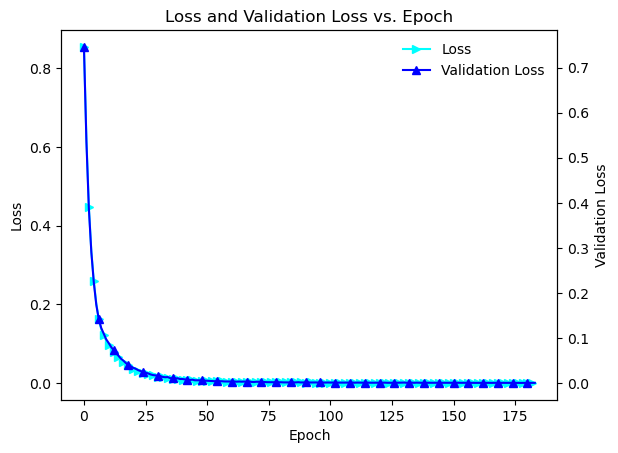

In [9]:
import matplotlib.pyplot as plt 

# Plot the validation loss vs. epoch
fig, ax1 = plt.subplots()
# Dataset 1
ax1.plot(history_cc.history['loss'], marker='>', label='Loss', markevery=2, c='cyan')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

# Create a twin y-axis
ax2 = ax1.twinx()

# Dataset 1 validation loss
ax2.plot(history_cc.history['val_loss'], marker='^', label='Validation Loss', markevery=6, c='b')
ax2.set_ylabel('Validation Loss')

# Combine the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', frameon=False)

plt.title('Loss and Validation Loss vs. Epoch')
plt.show()



In [10]:
history_cc.history['loss']

[0.8543959259986877,
 0.6213801503181458,
 0.44764211773872375,
 0.3350464105606079,
 0.25914594531059265,
 0.20246762037277222,
 0.1632443517446518,
 0.136673241853714,
 0.1219690814614296,
 0.10786032676696777,
 0.09726779162883759,
 0.08905331045389175,
 0.08000616729259491,
 0.07316043972969055,
 0.06602232903242111,
 0.05990687385201454,
 0.05418567359447479,
 0.048832789063453674,
 0.044784437865018845,
 0.040455590933561325,
 0.036456648260354996,
 0.033999040722846985,
 0.03025161102414131,
 0.028253860771656036,
 0.026527976617217064,
 0.024138392880558968,
 0.0217910073697567,
 0.02084309235215187,
 0.0192385483533144,
 0.017513129860162735,
 0.016027674078941345,
 0.015443594194948673,
 0.01423553004860878,
 0.013276159763336182,
 0.012247417122125626,
 0.011347394436597824,
 0.01094500906765461,
 0.009972532279789448,
 0.009743808768689632,
 0.009001290425658226,
 0.008619806729257107,
 0.008094019256532192,
 0.007868442684412003,
 0.0073671056888997555,
 0.0070848460309207

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


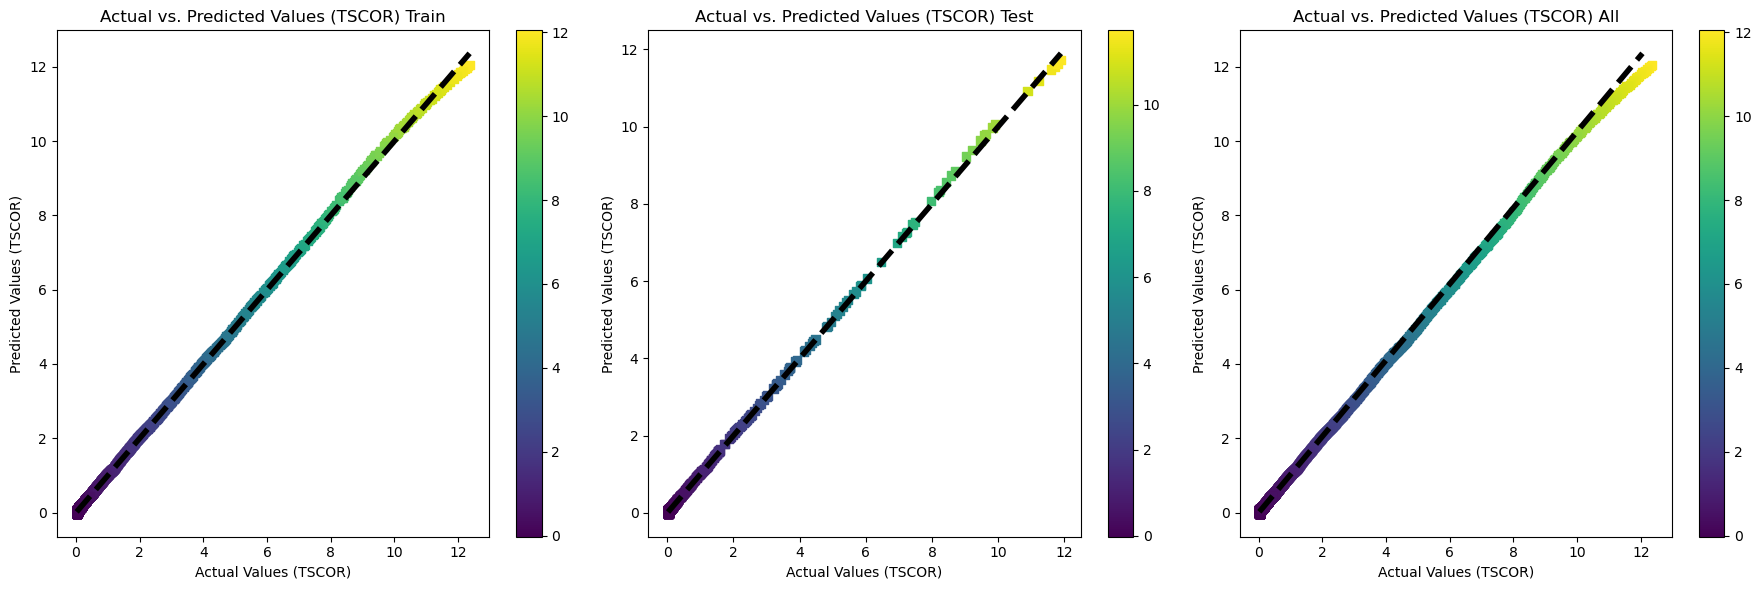

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Predict on the full dataset with the updated model
y_pred = model_regularized_dropout.predict(inputs_norm)

# Inverse transform the predicted values to get the original scale for filtered data
# Make predictions on the training and test data
y_pred_train = scaler_y.inverse_transform(model_regularized_dropout.predict(X_train))
y_pred_test = scaler_y.inverse_transform(model_regularized_dropout.predict(X_test))
y_pred_all =scaler_y.inverse_transform(y_pred) 


y_train=scaler_y.inverse_transform(y_train)
y_test=scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the predictions for both train and test sets

# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 0], y_pred_train[:, 0], c=y_pred_train[:, 0], cmap='viridis', marker='s')
plt.plot([y_train[:, 0].min(), y_train[:, 0].max()], [y_train[:, 0].min(), y_train[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 0], y_pred_test[:, 0], c=y_pred_test[:, 0], cmap='viridis', marker='s')
plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 0], y_pred_all[:, 0], c=y_pred_all[:, 0], cmap='viridis', marker='s')
plt.plot([y[:, 0].min(), y_pred_all[:, 0].max()], [y[:, 0].min(), y[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) All')
plt.colorbar()

plt.tight_layout()
plt.show()

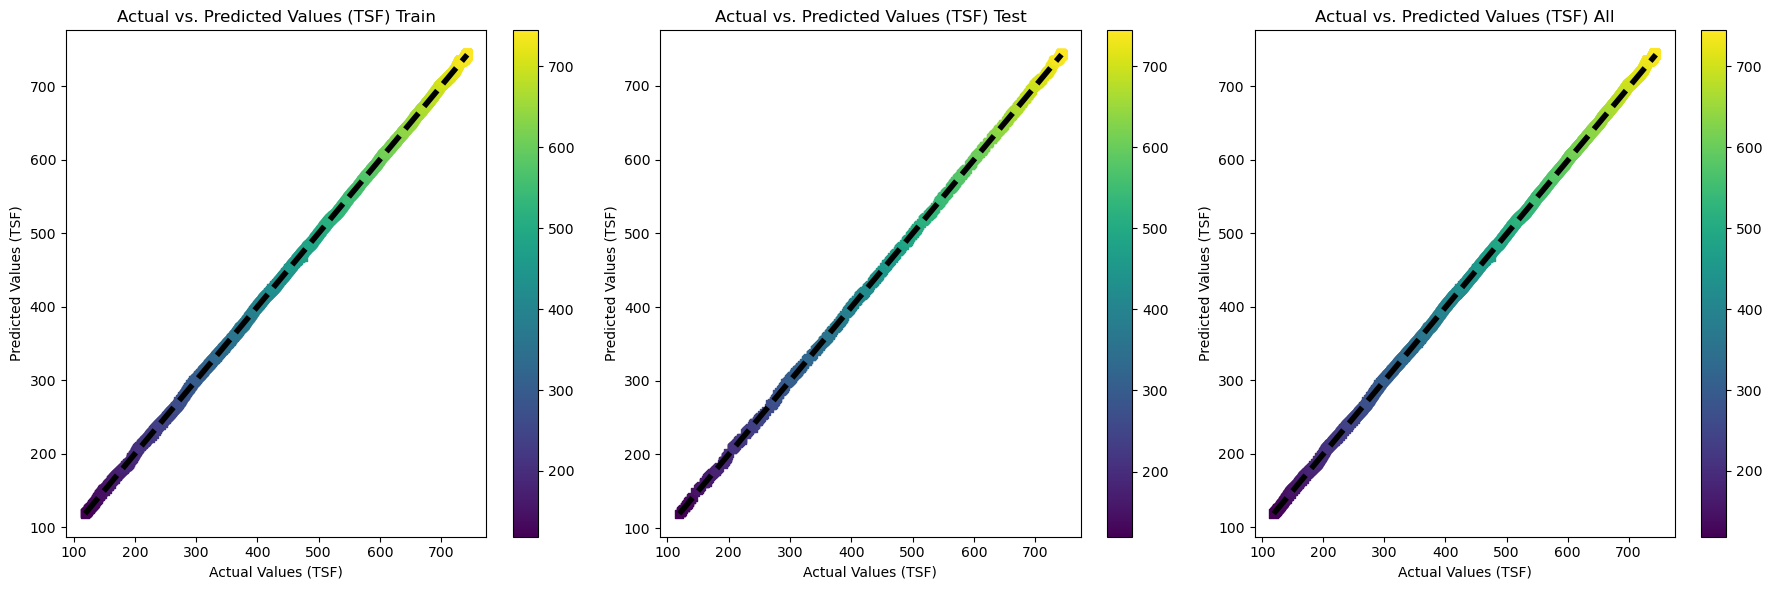

In [12]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 1], y_pred_train[:, 1], c=y_pred_train[:, 1], cmap='viridis', marker='s')
plt.plot([y_train[:, 1].min(), y_train[:, 1].max()], [y_train[:, 1].min(), y_train[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 1], y_pred_test[:, 1], c=y_pred_test[:, 1], cmap='viridis', marker='s')
plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 1], y_pred_all[:, 1], c=y_pred_all[:, 1], cmap='viridis', marker='s')
plt.plot([y[:, 1].min(), y_pred_all[:, 1].max()], [y[:, 1].min(), y[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) All')
plt.colorbar()

plt.tight_layout()
plt.show()

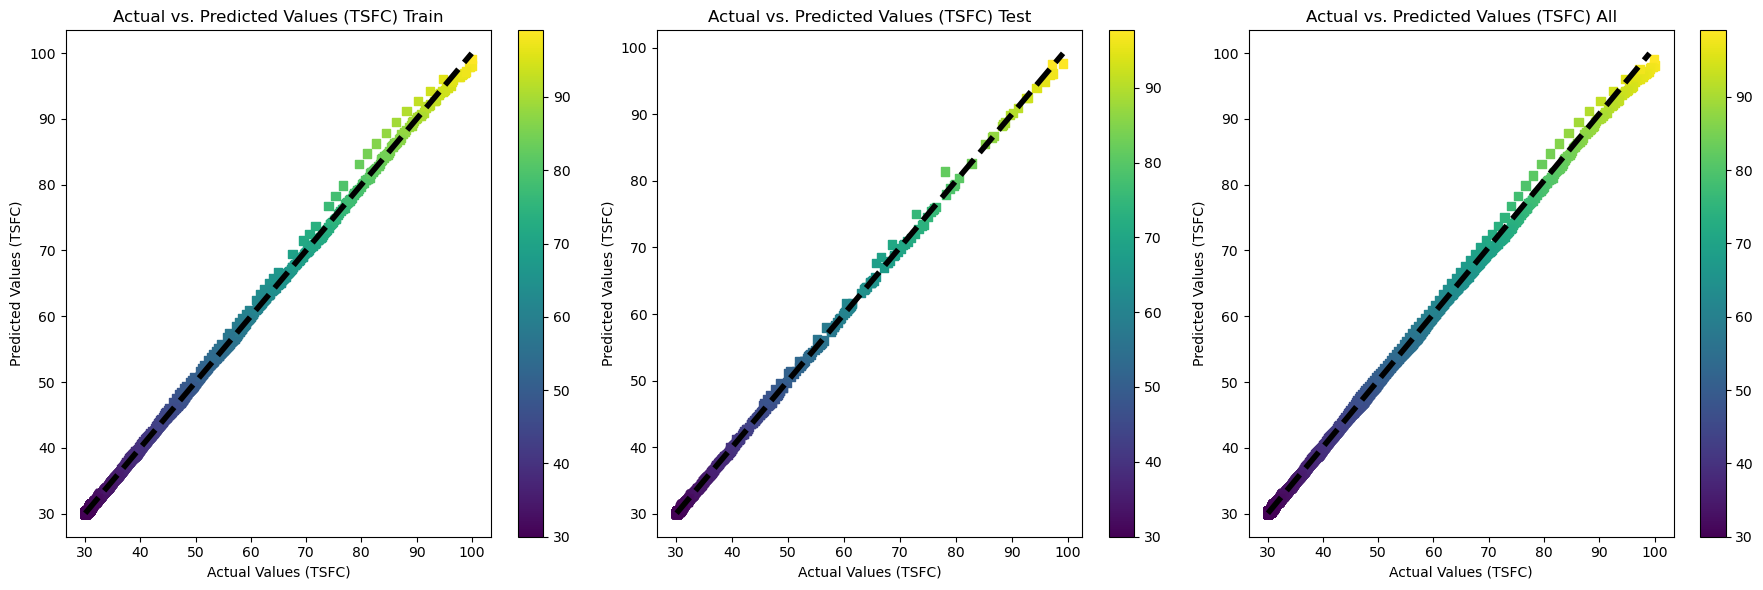

In [13]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 2], y_pred_train[:, 2], c=y_pred_train[:, 2], cmap='viridis', marker='s')
plt.plot([y_train[:, 2].min(), y_train[:, 2].max()], [y_train[:, 2].min(), y_train[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 2], y_pred_test[:, 2], c=y_pred_test[:, 2], cmap='viridis', marker='s')
plt.plot([y_test[:, 2].min(), y_test[:, 2].max()], [y_test[:, 2].min(), y_test[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 2], y_pred_all[:, 2], c=y_pred_all[:, 2], cmap='viridis', marker='s')
plt.plot([y[:, 2].min(), y_pred_all[:, 2].max()], [y[:, 2].min(), y[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) All')
plt.colorbar()

plt.tight_layout()
plt.show()

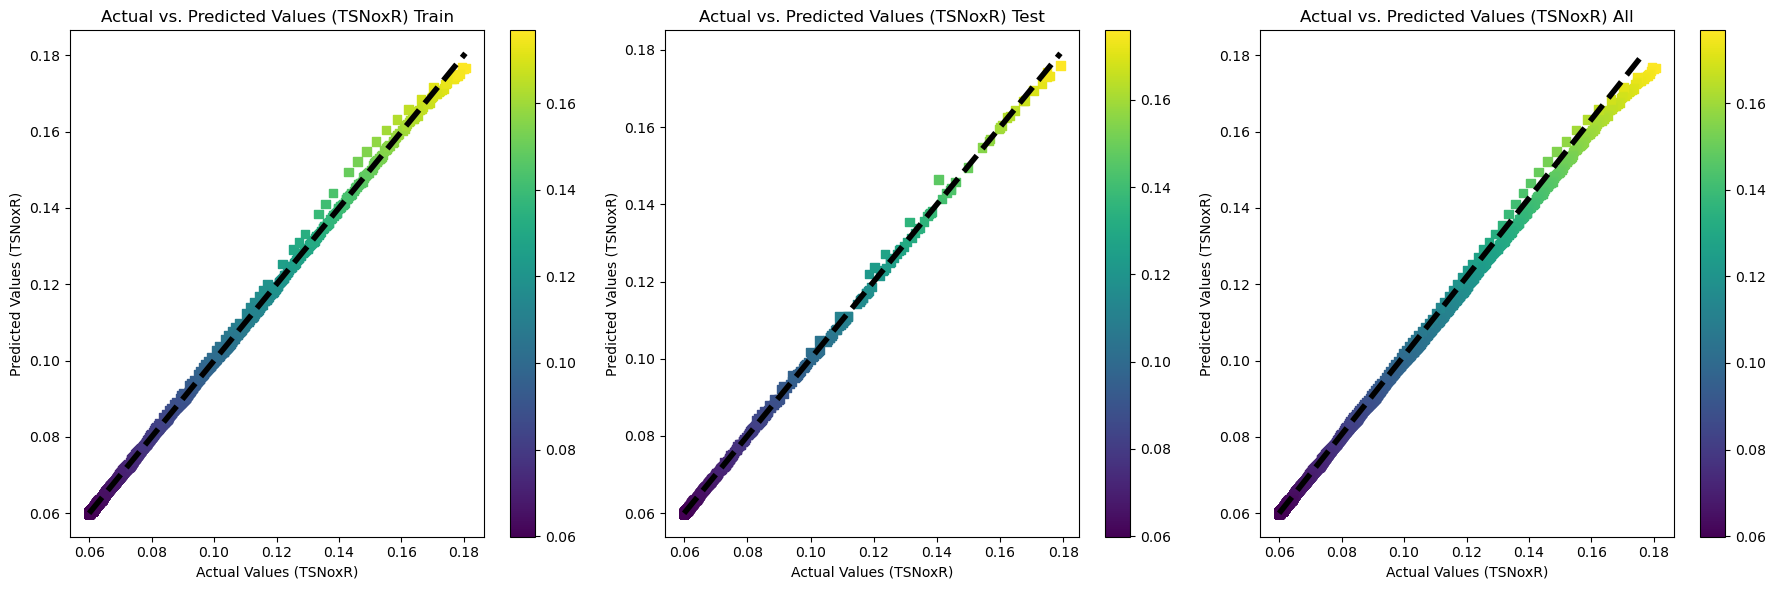

In [14]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 3], y_pred_train[:, 3], c=y_pred_train[:, 3], cmap='viridis', marker='s')
plt.plot([y_train[:, 3].min(), y_train[:, 3].max()], [y_train[:, 3].min(), y_train[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 3], y_pred_test[:, 3], c=y_pred_test[:, 3], cmap='viridis', marker='s')
plt.plot([y_test[:, 3].min(), y_test[:, 3].max()], [y_test[:, 3].min(), y_test[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 3], y_pred_all[:, 3], c=y_pred_all[:, 3], cmap='viridis', marker='s')
plt.plot([y[:, 3].min(), y_pred_all[:, 3].max()], [y[:, 3].min(), y[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) All')
plt.colorbar()

plt.tight_layout()
plt.show()

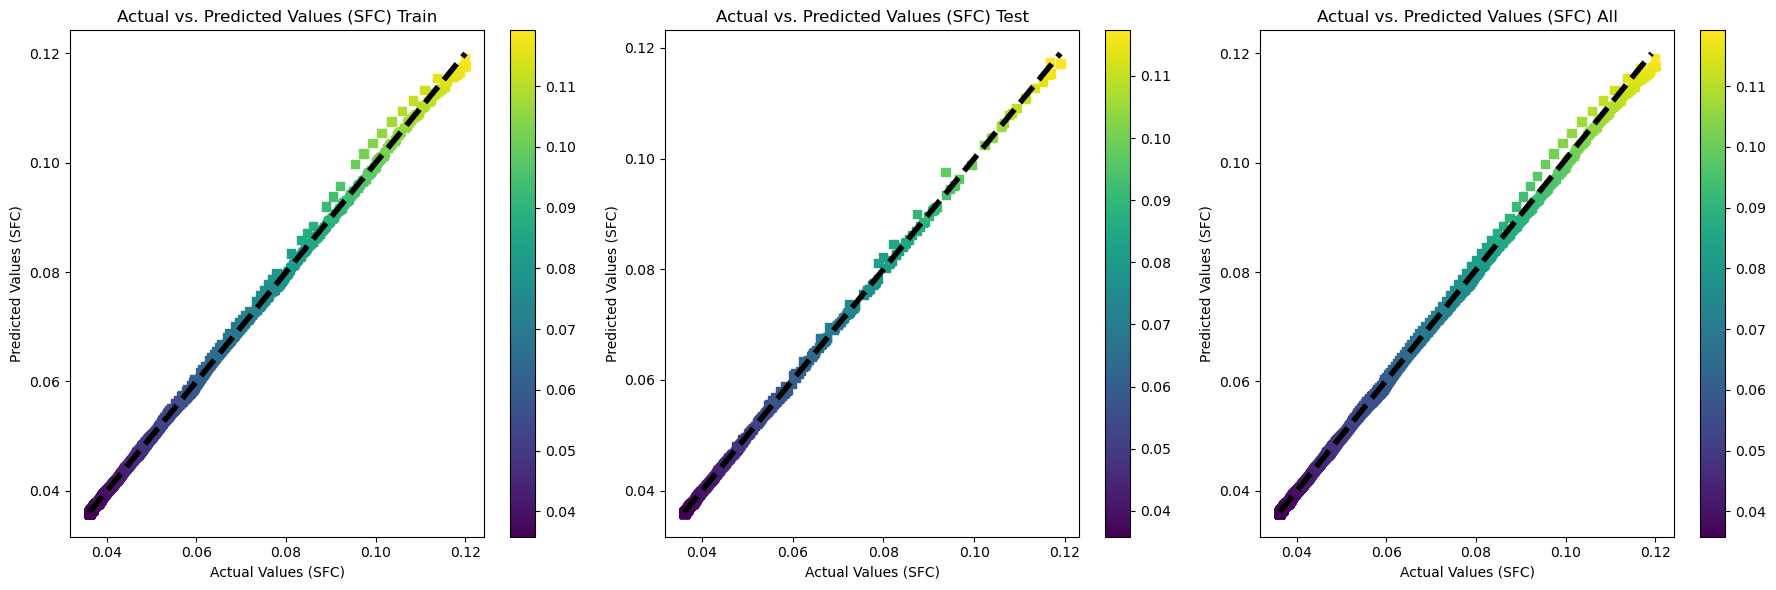

In [15]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))
#y = Data[['TSCOR','TSF','TSFC','','']].values

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 4], y_pred_train[:, 4], c=y_pred_train[:, 4], cmap='viridis', marker='s')
plt.plot([y_train[:, 4].min(), y_train[:, 4].max()], [y_train[:, 4].min(), y_train[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 4], y_pred_test[:, 4], c=y_pred_test[:, 4], cmap='viridis', marker='s')
plt.plot([y_test[:, 4].min(), y_test[:, 4].max()], [y_test[:, 4].min(), y_test[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 4], y_pred_all[:, 4], c=y_pred_all[:, 4], cmap='viridis', marker='s')
plt.plot([y[:, 4].min(), y_pred_all[:, 4].max()], [y[:, 4].min(), y[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) All')
plt.colorbar()

plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


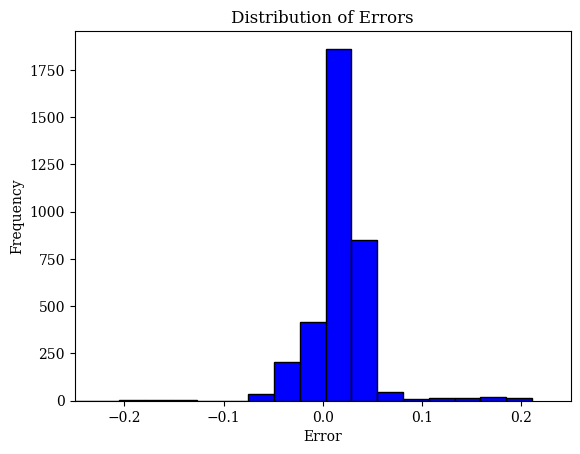

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 0]
actual_values = y[:, 0]

# Calculate the error between predicted and actual values
errors = (predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-0.25, 0.25)  # Set the x-axis range from -3 to 3

plt.show()

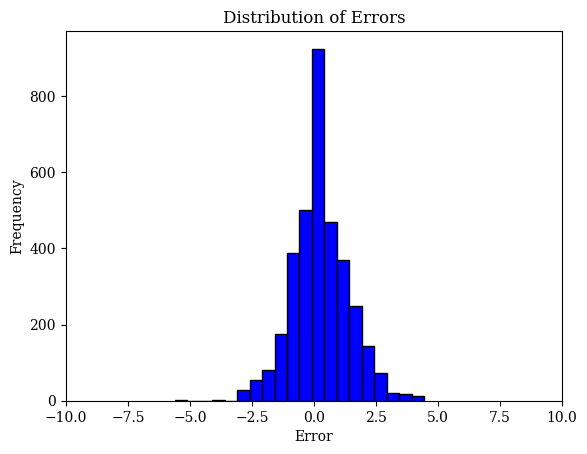

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 1]
actual_values = y[:, 1]

# Calculate the error between predicted and actual values
errors = (predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-10, 10)  # Set the x-axis range from -3 to 3

plt.show()

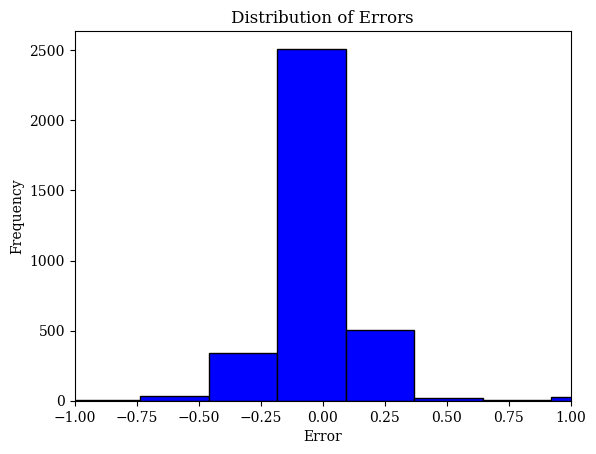

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 2]
actual_values = y[:, 2]

# Calculate the error between predicted and actual values
errors = (predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-1, 1)  # Set the x-axis range from -3 to 3

plt.show()

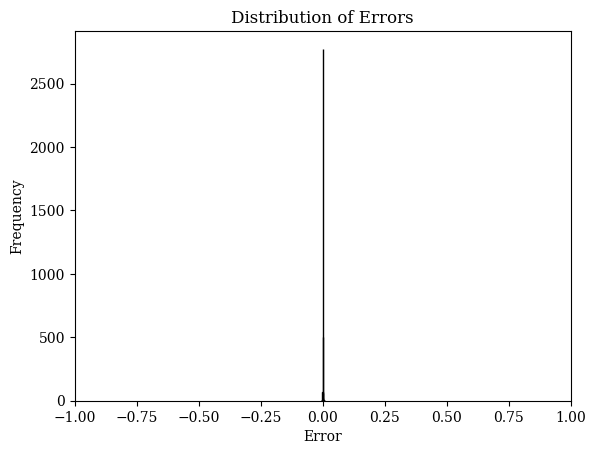

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 3]
actual_values = y[:, 3]

# Calculate the error between predicted and actual values
errors = (predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-1, 1)  # Set the x-axis range from -3 to 3

plt.show()

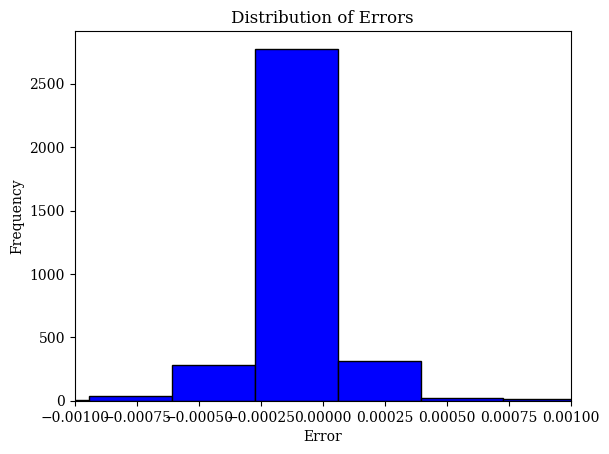

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 4]
actual_values = y[:, 4]

# Calculate the error between predicted and actual values
errors = (predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-1e-3, 1e-3)  # Set the x-axis range from -3 to 3

plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 0], y_pred_test[:, 0])
mse = mean_squared_error(y_test[:, 0], y_pred_test[:, 0])
rmse = mean_squared_error(y_test[:, 0], y_pred_test[:, 0], squared=False)
mae = mean_absolute_error(y_test[:, 0], y_pred_test[:, 0])

print("Test Set Metrics:")
print("R2 Score: (TSCOR)", r2)
print("Mean Squared Error: (TSCOR)", mse)
print("Root Mean Squared Error:(TSCOR)", rmse)
print("Mean Absolute Error:(TSCOR)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 0], y_pred_train[:, 0])
mse_train = mean_squared_error(y_train[:, 0], y_pred_train[:, 0])
rmse_train = mean_squared_error(y_train[:, 0], y_pred_train[:, 0], squared=False)
mae_train = mean_absolute_error(y_train[:, 0], y_pred_train[:, 0])

print("\nTrain Set Metrics:")
print("R2 Score: (TSCOR)", r2_train)
print("Mean Squared Error: (TSCOR)", mse_train)
print("Root Mean Squared Error: (TSCOR)", rmse_train)
print("Mean Absolute Error:(TSCOR)", mae_train)



Test Set Metrics:
R2 Score: (TSCOR) 0.9996729727307598
Mean Squared Error: (TSCOR) 0.0012431799811577697
Root Mean Squared Error:(TSCOR) 0.035258757510124625
Mean Absolute Error:(TSCOR) 0.025545552690109673

Train Set Metrics:
R2 Score: (TSCOR) 0.999700271351122
Mean Squared Error: (TSCOR) 0.0014436368405609712
Root Mean Squared Error: (TSCOR) 0.03799522128585345
Mean Absolute Error:(TSCOR) 0.026626945839909218


In [23]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 1], y_pred_test[:, 1])
mse = mean_squared_error(y_test[:, 1], y_pred_test[:, 1])
rmse = mean_squared_error(y_test[:, 1], y_pred_test[:, 1], squared=False)
mae = mean_absolute_error(y_test[:, 1], y_pred_test[:, 1])

print("Test Set Metrics:")
print("R2 Score: (TSF)", r2)
print("Mean Squared Error: (TSF)", mse)
print("Root Mean Squared Error:(TSF)", rmse)
print("Mean Absolute Error:(TSF)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 1], y_pred_train[:, 1])
mse_train = mean_squared_error(y_train[:, 1], y_pred_train[:, 1])
rmse_train = mean_squared_error(y_train[:, 1], y_pred_train[:, 1], squared=False)
mae_train = mean_absolute_error(y_train[:, 1], y_pred_train[:, 1])

print("\nTrain Set Metrics:")
print("R2 Score: (TSF)", r2_train)
print("Mean Squared Error: (TSF)", mse_train)
print("Root Mean Squared Error: (TSF)", rmse_train)
print("Mean Absolute Error:(TSF)", mae_train)

Test Set Metrics:
R2 Score: (TSF) 0.9999633013012678
Mean Squared Error: (TSF) 1.2855354454494963
Root Mean Squared Error:(TSF) 1.1338145551409615
Mean Absolute Error:(TSF) 0.8568274787761339

Train Set Metrics:
R2 Score: (TSF) 0.9999610154763947
Mean Squared Error: (TSF) 1.3759369147299914
Root Mean Squared Error: (TSF) 1.1730033737078471
Mean Absolute Error:(TSF) 0.8831255676574489


In [24]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 3], y_pred_test[:, 3])
mse = mean_squared_error(y_test[:, 3], y_pred_test[:, 3])
rmse = mean_squared_error(y_test[:, 3], y_pred_test[:, 3], squared=False)
mae = mean_absolute_error(y_test[:, 3], y_pred_test[:, 3])

print("Test Set Metrics:")
print("R2 Score: (TSNoxR)", r2)
print("Mean Squared Error: (TSNoxR)", mse)
print("Root Mean Squared Error:(TSNoxR)", rmse)
print("Mean Absolute Error:(TSNoxR)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 3], y_pred_train[:, 3])
mse_train = mean_squared_error(y_train[:, 3], y_pred_train[:, 3])
rmse_train = mean_squared_error(y_train[:, 3], y_pred_train[:, 3], squared=False)
mae_train = mean_absolute_error(y_train[:, 3], y_pred_train[:, 3])

print("\nTrain Set Metrics:")
print("R2 Score: (TSNoxR)", r2_train)
print("Mean Squared Error: (TSNoxR)", mse_train)
print("Root Mean Squared Error: (TSNoxR)", rmse_train)
print("Mean Absolute Error:(TSNoxR)", mae_train)

Test Set Metrics:
R2 Score: (TSNoxR) 0.9995366201840786
Mean Squared Error: (TSNoxR) 2.64333949960306e-07
Root Mean Squared Error:(TSNoxR) 0.0005141341750557981
Mean Absolute Error:(TSNoxR) 0.0002317012296151505

Train Set Metrics:
R2 Score: (TSNoxR) 0.9994979463417805
Mean Squared Error: (TSNoxR) 2.687547498563578e-07
Root Mean Squared Error: (TSNoxR) 0.0005184156149812213
Mean Absolute Error:(TSNoxR) 0.00022416300850242981


In [25]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 4], y_pred_test[:, 4])
mse = mean_squared_error(y_test[:, 4], y_pred_test[:, 4])
rmse = mean_squared_error(y_test[:, 4], y_pred_test[:, 4], squared=False)
mae = mean_absolute_error(y_test[:, 4], y_pred_test[:, 4])

print("Test Set Metrics:")
print("R2 Score: (TSFCC)", r2)
print("Mean Squared Error: (TSFCC)", mse)
print("Root Mean Squared Error:(TSFCC)", rmse)
print("Mean Absolute Error:(TSFCC)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 4], y_pred_train[:, 4])
mse_train = mean_squared_error(y_train[:, 4], y_pred_train[:, 4])
rmse_train = mean_squared_error(y_train[:, 4], y_pred_train[:, 4], squared=False)
mae_train = mean_absolute_error(y_train[:, 4], y_pred_train[:, 4])

print("\nTrain Set Metrics:")
print("R2 Score: (TSFCC)", r2_train)
print("Mean Squared Error: (TSFCC)", mse_train)
print("Root Mean Squared Error: (TSFCC)", rmse_train)
print("Mean Absolute Error:(TSFCC)", mae_train)



Test Set Metrics:
R2 Score: (TSFCC) 0.9996187163934456
Mean Squared Error: (TSFCC) 1.1076886077862016e-07
Root Mean Squared Error:(TSFCC) 0.0003328195618929575
Mean Absolute Error:(TSFCC) 0.00016381313739251488

Train Set Metrics:
R2 Score: (TSFCC) 0.9995319912686167
Mean Squared Error: (TSFCC) 1.2844300943793712e-07
Root Mean Squared Error: (TSFCC) 0.00035838946613696266
Mean Absolute Error:(TSFCC) 0.00016853908251558865


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

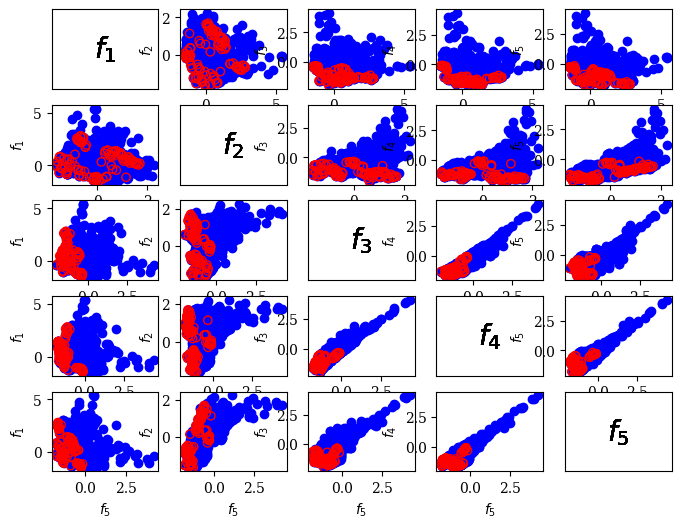

In [26]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.evaluator import Evaluator
from pymoo.core.problem import Problem
from pymoo.core.termination import NoTermination
from pymoo.visualization.scatter import Scatter
from pymoo.problems.static import StaticProblem


# Define the multi-objective function using the trained neural network
def multi_objective_function(x):
    inputs_test_norm = scaler_x.transform(np.array(x).reshape(1, -1))
    #y_pred = scaler_y.inverse_transform(model_regularized_dropout.predict(inputs_test_norm))
    y_pred = model_regularized_dropout.predict(inputs_test_norm)
    return (y_pred[0, 0], -y_pred[0, 1],y_pred[0, 2],y_pred[0, 3],y_pred[0, 4])

problem = Problem(n_var=6, n_obj=5, n_constr=0, xl=[0.01, 0.01, 1.5, 1.5, 1.5, 1600], xu=[0.3,0.3,8, 3.5, 7, 2175])

# Create the algorithm object
algorithm = NSGA2(pop_size=100)

# Let the algorithm object never terminate and let the loop control it
termination = NoTermination()

# Create an algorithm object that never terminates
algorithm.setup(problem, termination=termination)

# Fix the random seed manually
np.random.seed(1)

# Initialize plot
plot = Scatter()

# Until the algorithm has not terminated
for n_gen in range(10):
    # Ask the algorithm for the next solution to be evaluated
    pop = algorithm.ask()

    # Get the design space values of the algorithm
    X = pop.get("X")

    # Evaluate objectives using the multi-objective function
    F = np.array([multi_objective_function(x) for x in X])
    static = StaticProblem(problem, F=F)
    Evaluator().eval(static, pop)

    # Returned the evaluated individuals which have been evaluated or even modified
    algorithm.tell(infills=pop)

    # Update plot with current generation
    plot.add(pop.get("F"), color="blue")

# Add Pareto front to plot
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)

# Obtain the result objective from the algorithm
res = algorithm.result()

# Calculate a hash to show that all executions end with the same result
print("hash", res.F.sum())

# Retrieve the optimal inputs from the optimization result
optimal_inputs = res.X
print("Optimal Inputs:")
for input_values in optimal_inputs:
    print(input_values)

# Add final result to plot
plot.add(res.F, facecolor="none", edgecolor="red")

# Show plot
plot.show()


In [27]:

# Add Pareto front to plot
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)

for input_values in optimal_inputs:
    print(input_values)

# Add final result to plot
plot.add(res.F, facecolor="none", edgecolor="red")

# Show plot
plot.show()

[1.93076285e-02 3.32912198e-02 1.53246084e+00 2.64417794e+00
 6.88230261e+00 1.60721969e+03]
[5.41465629e-02 2.12002527e-02 1.79594375e+00 3.11105363e+00
 6.91970324e+00 1.62748309e+03]
[2.99530866e-01 1.93533294e-02 1.64001491e+00 1.60104926e+00
 1.74311118e+00 1.67152109e+03]
[1.49792889e-02 1.58171045e-02 1.65520883e+00 3.02411727e+00
 4.54240260e+00 1.61347158e+03]
[2.25972929e-02 1.74524962e-02 7.69510810e+00 3.17363929e+00
 6.67565424e+00 1.89493943e+03]
[1.40506898e-02 1.72077751e-02 1.64089254e+00 2.86625124e+00
 1.76219647e+00 1.63606399e+03]
[3.79512488e-02 1.69767685e-01 7.68031075e+00 3.17966131e+00
 2.93954895e+00 2.11287084e+03]
[2.03713556e-02 1.36377152e-01 7.88353502e+00 2.74776634e+00
 4.74376745e+00 2.00973571e+03]
[1.76231801e-02 1.35615070e-01 7.88353502e+00 3.18178309e+00
 4.74376745e+00 2.00101430e+03]
[1.82187525e-02 1.03007261e-02 6.01360103e+00 3.00014688e+00
 1.67256413e+00 2.02105998e+03]
[3.96714174e-02 1.10385592e-02 5.96024351e+00 2.77070744e+00
 1.672564

In [28]:
import pandas as pd

# Assuming res.F contains the optimal outputs and res.X contains the optimal inputs
optimal_inputs = res.X
optimal_outputs = scaler_y.inverse_transform(np.abs(res.F)) 
df_optimal_inputs = pd.DataFrame(optimal_inputs, columns=['BPR1', 'BPR2', 'PR_HPC', 'PR_IPC', 'PR_LPC', 'TIT'])
df_optimal_outputs = pd.DataFrame(optimal_outputs, columns=['TSCOR', 'TSF', 'TSFC', 'TSNoxR', 'SFC'])
Optimaldata=pd.concat([df_optimal_inputs,df_optimal_outputs],axis=1)

# Write the combined optimal data to an Excel file
Optimaldata.to_excel("Optimalsbypass.xlsx") 



In [29]:
res.F

array([[ 1.013767  ,  0.95398867, -1.62181818, -1.78523552, -0.98221749],
       [ 0.17894763,  1.69834363, -1.62387276, -1.58093214, -0.57592505],
       [ 0.85494047, -1.4832145 , -0.63619697, -1.43961859, -1.8047334 ],
       [-0.37129343,  0.61146516, -2.00399303, -1.35845041, -1.11702561],
       [-1.13465703,  1.14558876, -0.71261013, -0.32283574, -0.17547938],
       [-0.02988539, -1.62645209, -1.48344803, -1.22454417, -1.35798919],
       [-1.40353024, -0.15901081, -0.37611064, -0.09642629, -0.27153355],
       [-1.25296009, -0.02690469, -0.34664625, -0.19962972, -0.30762243],
       [-1.48224771,  0.06440064, -0.41688541, -0.11561412, -0.2726101 ],
       [ 2.81069446, -0.66217083, -1.4074477 , -1.08774173, -1.70559967],
       [ 2.57164168, -0.81019652, -1.13818908, -0.94144958, -1.51869392],
       [-1.06621814,  0.36601239, -0.83219689, -0.52396137, -0.54957867],
       [ 0.47871971,  1.36712825, -1.79180956, -1.64242971, -0.80283922],
       [-1.09224212,  0.37664786, -0.7

In [30]:
model_regularized_dropout.predict(scaler_x.transform(optimal_inputs))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 1.0137672 , -0.95398855, -1.6218182 , -1.7852356 , -0.9822175 ],
       [ 0.17894761, -1.6983434 , -1.6238726 , -1.580932  , -0.575925  ],
       [ 0.8549395 ,  1.4832151 , -0.6361982 , -1.4396186 , -1.8047334 ],
       [-0.37129337, -0.6114651 , -2.0039933 , -1.3584504 , -1.1170257 ],
       [-1.134657  , -1.1455885 , -0.71260995, -0.32283568, -0.17547926],
       [-0.02988546,  1.6264526 , -1.4834477 , -1.2245442 , -1.3579893 ],
       [-1.4035305 ,  0.15901083, -0.37611046, -0.09642629, -0.2715336 ],
       [-1.2529601 ,  0.02690482, -0.34664616, -0.19962989, -0.30762237],
       [-1.4822478 , -0.06440056, -0.41688535, -0.11561415, -0.27260998],
       [ 2.8106956 ,  0.66217065, -1.4074477 , -1.0877414 , -1.7055997 ],
       [ 2.5716414 ,  0.81019664, -1.1381891 , -0.94144964, -1.5186938 ],
       [-1.0662185 , -0.36601245, -0.8321969 , -0.5239615 , -0.54957867],
       [ 0.47872   , -1.3671284 , -1.7918094 , -1.6424298 , -0.80283934],
       [-1.0922421 , -0.3766477 , -0.7

In [31]:
optimal_inputs

array([[1.93076285e-02, 3.32912198e-02, 1.53246084e+00, 2.64417794e+00,
        6.88230261e+00, 1.60721969e+03],
       [5.41465629e-02, 2.12002527e-02, 1.79594375e+00, 3.11105363e+00,
        6.91970324e+00, 1.62748309e+03],
       [2.99530866e-01, 1.93533294e-02, 1.64001491e+00, 1.60104926e+00,
        1.74311118e+00, 1.67152109e+03],
       [1.49792889e-02, 1.58171045e-02, 1.65520883e+00, 3.02411727e+00,
        4.54240260e+00, 1.61347158e+03],
       [2.25972929e-02, 1.74524962e-02, 7.69510810e+00, 3.17363929e+00,
        6.67565424e+00, 1.89493943e+03],
       [1.40506898e-02, 1.72077751e-02, 1.64089254e+00, 2.86625124e+00,
        1.76219647e+00, 1.63606399e+03],
       [3.79512488e-02, 1.69767685e-01, 7.68031075e+00, 3.17966131e+00,
        2.93954895e+00, 2.11287084e+03],
       [2.03713556e-02, 1.36377152e-01, 7.88353502e+00, 2.74776634e+00,
        4.74376745e+00, 2.00973571e+03],
       [1.76231801e-02, 1.35615070e-01, 7.88353502e+00, 3.18178309e+00,
        4.74376745e+00, 